In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (14,14))

news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

<Figure size 1400x1400 with 0 Axes>

# preprocessing

In [18]:
def labeling(x):
    if x == '경향신문':
        return 0
    elif x == '국민일보':
        return 1
    elif x == '내일신문':
        return 2
    elif x == '동아일보':
        return 3
    elif x == '문화일보':
        return 4
    elif x == '서울신문':
        return 5
    elif x == '세계일보':
        return 6
    elif x == '조선일보':
        return 7
    elif x == '중앙일보':
        return 8
    elif x == '한겨례':
        return 9
    elif x == '한국일보':
        return 10

In [19]:
news_df['label'] = news_df['언론사'].apply(lambda x : labeling(x))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

text = news_df['키워드']


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).toarray()

nor = Normalizer()
norvec = nor.fit_transform(vec)

# PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(norvec)
pca_df = pd.DataFrame(data=pca, columns = ['component 0', 'component 1'])
pca_df["label"] = news_df['label']

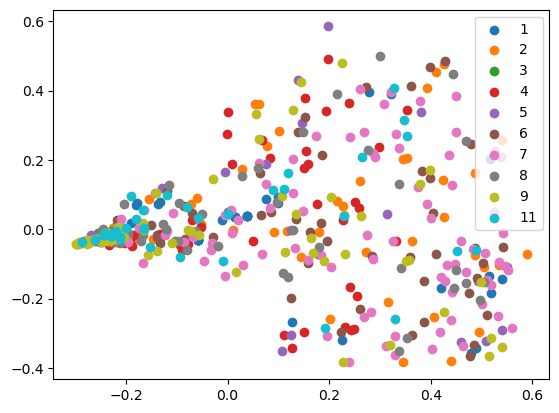

In [22]:
fig, ax = plt.subplots()

groups = pca_df.groupby('label')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

# LSA 

In [23]:
from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=2).fit_transform(norvec)
svd_df = pd.DataFrame(data=svd, columns = ['component 0', 'component 1'])
svd_df["label"] = news_df['label']

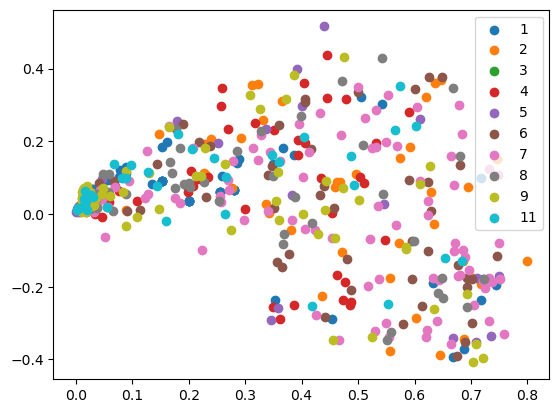

In [24]:
fig, ax = plt.subplots()

groups = svd_df.groupby('label')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

# t-SNE

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(norvec)
tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])
tsne_df["label"] = news_df['label']

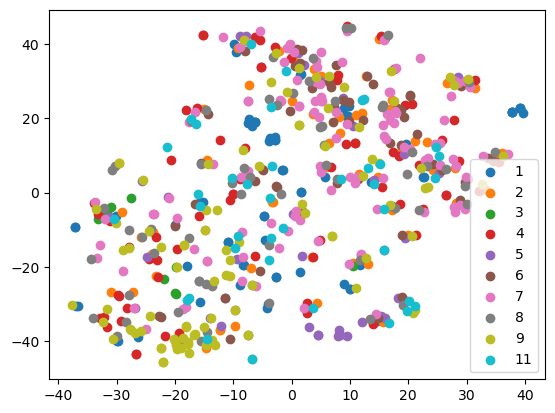

In [26]:
fig, ax = plt.subplots()

groups = tsne_df.groupby('label')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

# K-means Clustering

In [27]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=12, max_iter=100, random_state=10) 

kmeans.fit(norvec)

labels = kmeans.labels_

# PCA with K-Means

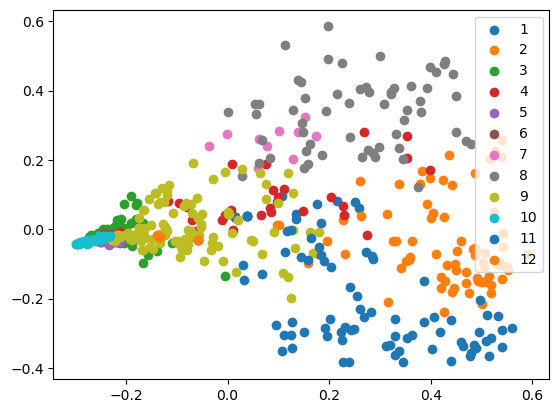

In [28]:
pca_df['군집'] = labels

fig, ax = plt.subplots()

groups = pca_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

# LSA with K-Means

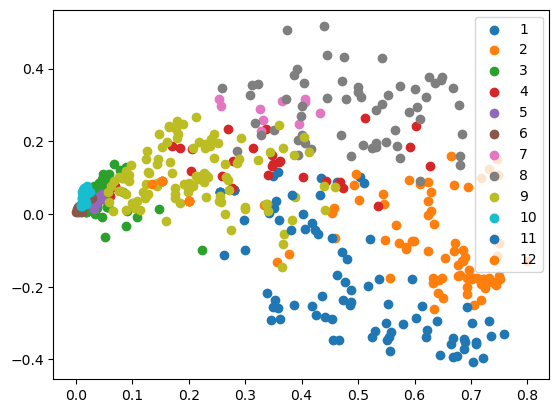

In [29]:
svd_df['군집'] = labels

fig, ax = plt.subplots()

groups = svd_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()

# t-SNE with K-Means

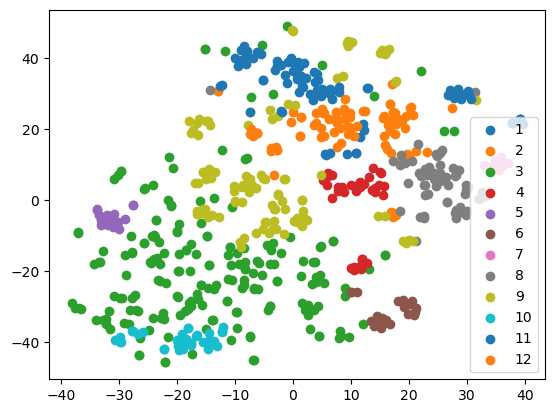

In [30]:
tsne_df['군집'] = labels

fig, ax = plt.subplots()

groups = tsne_df.groupby('군집')
for name, points in groups:
    ax.scatter(points['component 0'], points['component 1'], label=int(name) + 1)

ax.legend()